In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
import imblearn
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

import joblib

In [2]:
warnings.filterwarnings('ignore')

# Data Preprocessing

In [34]:
df = pd.read_csv('Spotify_Youtube.csv')
df.keys()

Index(['Num', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type', 'Uri',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [35]:
df.shape
df.head()

,Num,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [36]:
# null values in dataset
df.isnull().sum()

Num                   0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [37]:
df.describe()

,Num,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


**bold text**# Data Cleaning

In [38]:
# Drop irrelavant variables:
url_cols = ['Artist', 'Url_spotify', 'Track', 'Album',
            'Album_type', 'Uri', 'Url_youtube','Channel', 'Title','Description']

df = df[(df['Licensed'] == True) & (df['official_video'] == True)]

df.drop(url_cols, axis=1, inplace=True)

df.dropna(inplace=True)

# print top rows
df.head()

,Num,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [40]:
def classify_hits(df):
    views_40th = df["Views"].quantile(0.4)
    views_80th = df["Views"].quantile(0.8)
    streams_40th = df["Stream"].quantile(0.4)
    streams_80th = df["Stream"].quantile(0.8)

    df["Hit"] = 1  

    for index, row in df.iterrows():
        if row["Views"] >= views_80th and row["Stream"] >= streams_80th:
            df.at[index, "Hit"] = 2 
        elif row["Views"] < views_40th or row["Stream"] < streams_40th:
            df.at[index, "Hit"] = 0  

    return df
classify_hits(df)

,Num,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Hit
0,0,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.7720,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,2
1,1,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.8520,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,1
2,2,0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.5510,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07,0
3,3,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.5780,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,2
4,4,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.5250,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,0.582,0.926,5.0,-6.344,0.0328,0.448000,0.000000,0.0839,0.6580,90.002,94667.0,71678.0,1113.0,0.0,True,True,9.227144e+06,0
20714,20714,0.531,0.936,4.0,-1.786,0.1370,0.028000,0.000000,0.0923,0.6570,174.869,150857.0,164741.0,2019.0,0.0,True,True,1.089818e+07,0
20715,20715,0.443,0.830,4.0,-4.679,0.0647,0.024300,0.000000,0.1540,0.4190,168.388,136842.0,35646.0,329.0,0.0,True,True,6.226110e+06,0
20716,20716,0.417,0.767,9.0,-4.004,0.4190,0.356000,0.018400,0.1080,0.5390,155.378,108387.0,6533.0,88.0,0.0,True,True,6.873961e+06,0


## Data Visualization

Hit
0    7196
1    4854
2    1677
Name: count, dtype: int64


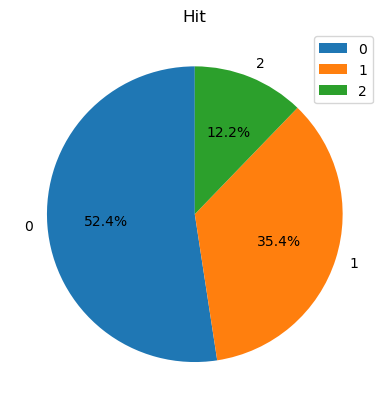

In [41]:
# Create a pie chart
Hit_count = df['Hit'].value_counts()
print(Hit_count)

labels = Hit_count.index.tolist()
sizes = Hit_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Hit')
plt.legend(labels, loc='best')

plt.show()

Views min:  41.0
Views max:  8079649362.0
Views median:  26000918.0
Views mean:  122802336.68849713


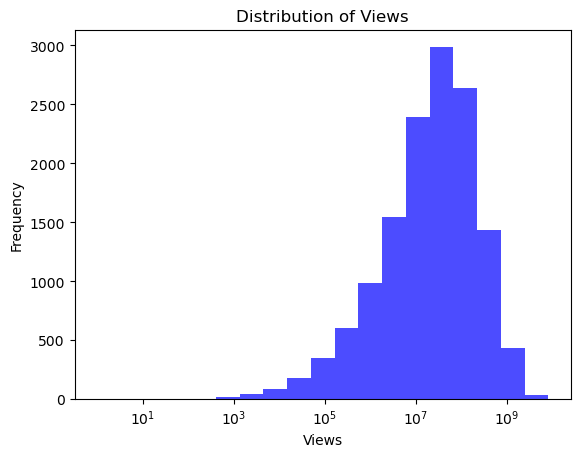

In [42]:
#distribution of views, logarithmic x scale

plt.hist(df["Views"], bins=np.logspace(np.log10(1), np.log10(df["Views"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.xscale('log')

views_min = df["Views"].min()
views_max = df["Views"].max()
views_median = df["Views"].median()
views_mean = df["Views"].mean()

print("Views min: ", views_min)
print("Views max: ", views_max)
print("Views median: ", views_median)
print("Views mean: ", views_mean)

Stream min:  6574.0
Stream max:  3386520288.0
Stream median:  55687588.0


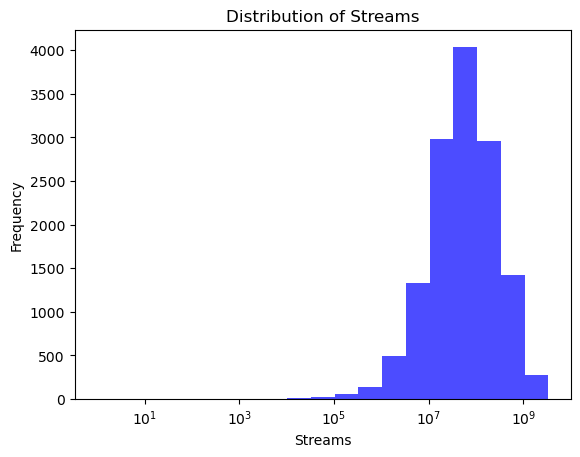

In [43]:
# distribution of streams, logarithmic x scale

plt.hist(df["Stream"], bins=np.logspace(np.log10(1), np.log10(df["Stream"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.xscale('log')

stream_min = df["Stream"].min()
stream_max = df["Stream"].max()
stream_median = df["Stream"].median()

print("Stream min: ", stream_min)
print("Stream max: ", stream_max)
print("Stream median: ", stream_median)

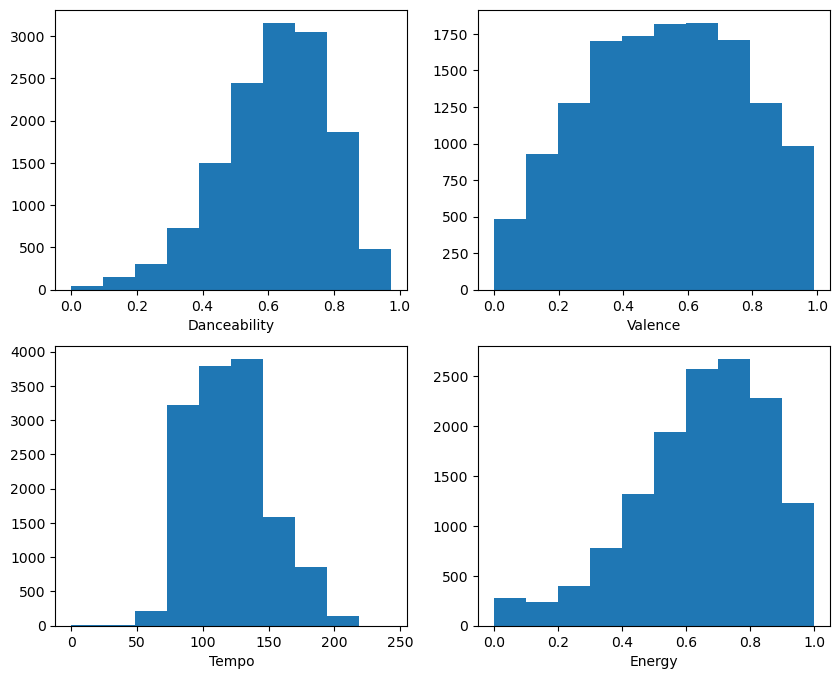

In [44]:
# histogram of four spotify API features

# four subplots
fig, ((ax, bx), (cx, dx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ax.hist(df["Danceability"])
ax.set_xlabel('Danceability')

# second feature: 'Valence'
x_index = 0
bx.hist(df['Valence'])
bx.set_xlabel('Valence')

# third feature: 'Tempo'
x_index = 0
cx.hist(df['Tempo'])
cx.set_xlabel('Tempo')

# fourth feature: 'Energy'
x_index = 0
dx.hist(df['Energy'])
dx.set_xlabel('Energy')

plt.show()

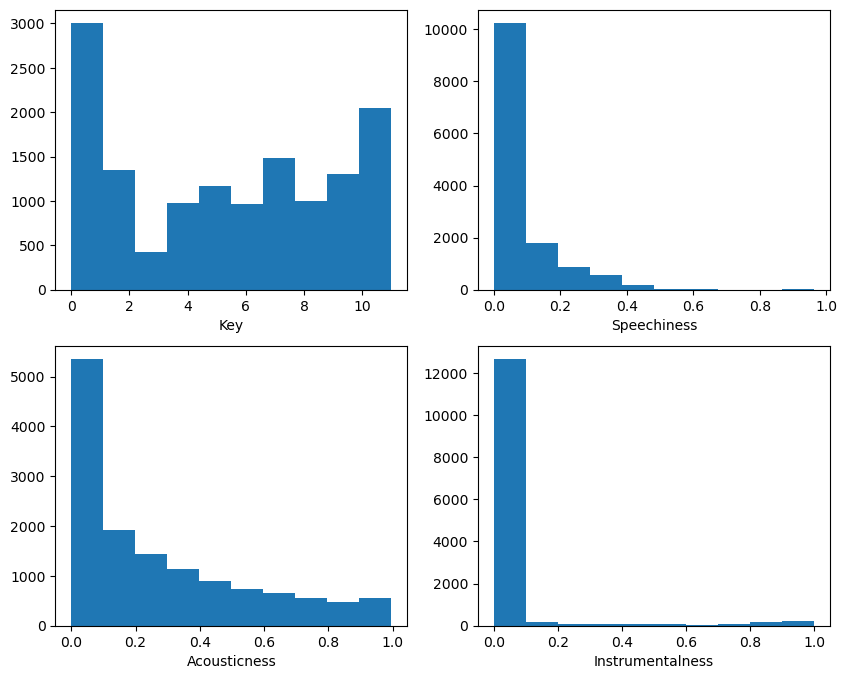

In [45]:
# histogram of four more spotify API features

# four subplots
fig, ((ex, fx), (hx, gx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ex.hist(df["Key"])
ex.set_xlabel('Key')

# second feature: 'Valence'
x_index = 0
fx.hist(df['Speechiness'])
fx.set_xlabel('Speechiness')

# third feature: 'Tempo'
x_index = 0
hx.hist(df['Acousticness'])
hx.set_xlabel('Acousticness')

# fourth feature: 'Energy'
x_index = 0
gx.hist(df['Instrumentalness'])
gx.set_xlabel('Instrumentalness')

plt.show()

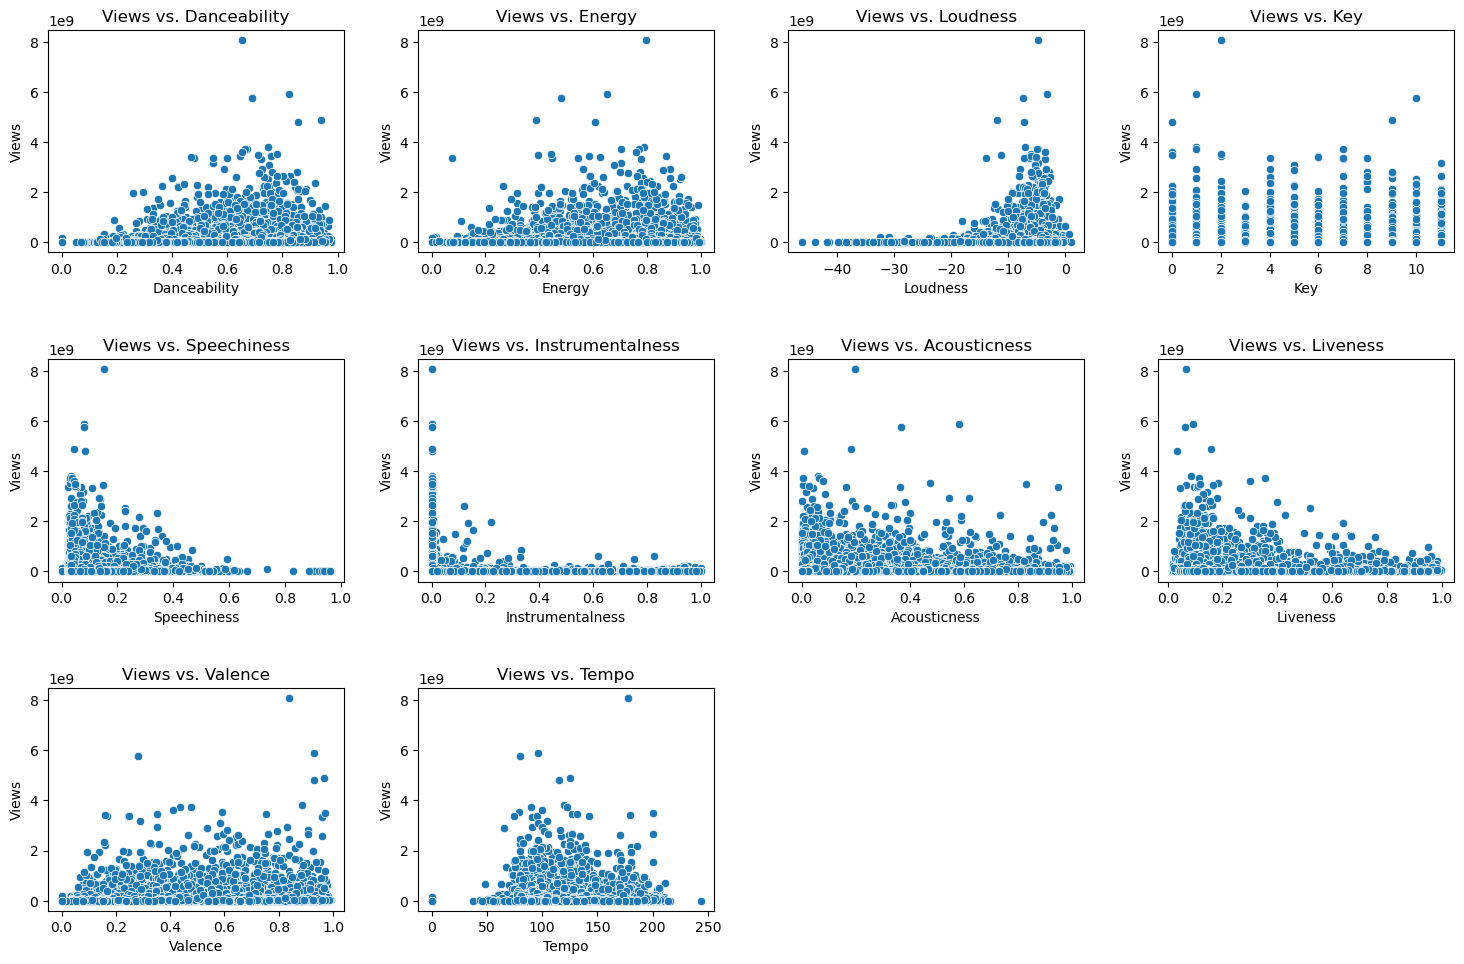

In [46]:
features = ['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness',
            'Acousticness', 'Liveness', 'Valence', 'Tempo']
plot_data = df[['Views'] + features]

plt.figure(figsize=(15, 10))

for index, feature in enumerate(features):
    plt.subplot(3, 4, index + 1)
    sns.scatterplot(data=plot_data, x=feature, y='Views', marker='o')
    plt.title(f'Views vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Views')

plt.tight_layout(pad=2.0)
plt.show()

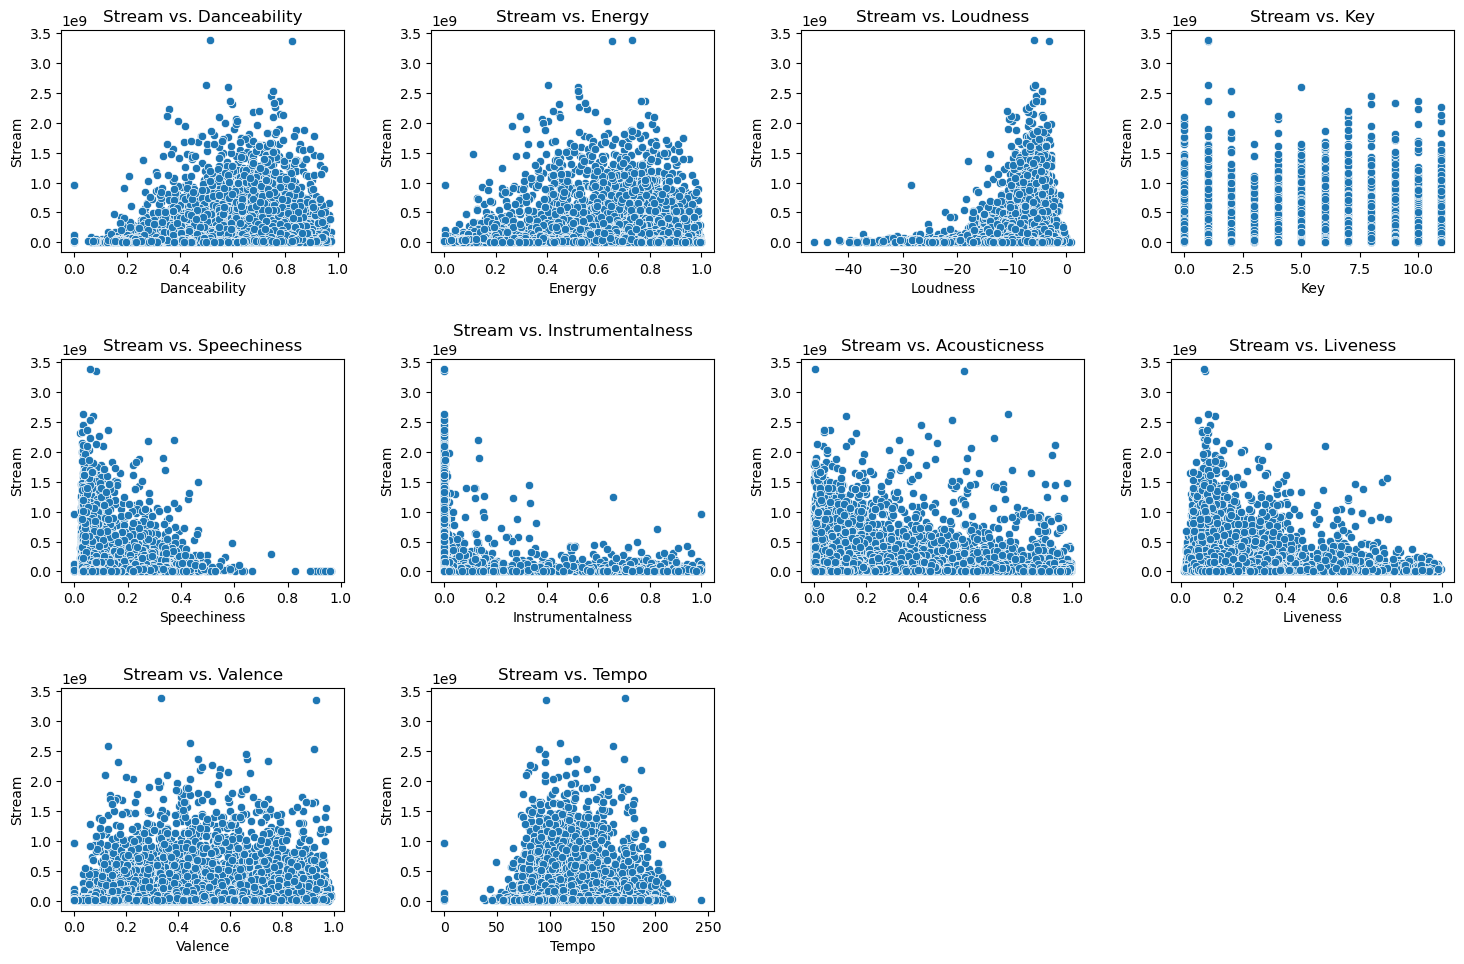

In [47]:
features = ['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness',
            'Acousticness', 'Liveness', 'Valence', 'Tempo']
plot_data = df[['Stream'] + features]

plt.figure(figsize=(15, 10))

for index, feature in enumerate(features):
    plt.subplot(3, 4, index + 1)
    sns.scatterplot(data=plot_data, x=feature, y='Stream', marker='o')
    plt.title(f'Stream vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Stream')

plt.tight_layout(pad=2.0)
plt.show()

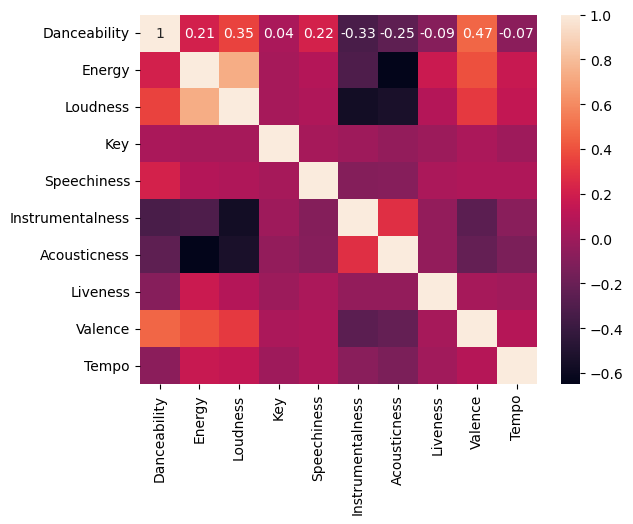

In [48]:
df_corr = df[['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness',
              'Acousticness', 'Liveness', 'Valence', 'Tempo']].corr().round(2)

sns.heatmap(df_corr, annot=True)
plt.show()

In [49]:
prediction_df = df[['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness',
              'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Views', 'Stream']]
correlation_matrix = prediction_df.corr()
views_correlation = correlation_matrix[['Views']]
streams_correlation = correlation_matrix[['Stream']]

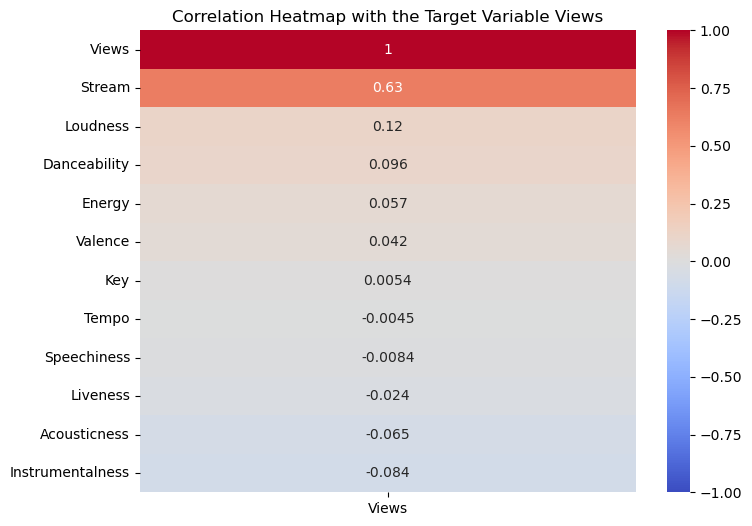

In [50]:
plt.figure(figsize=(8, 6))
sns.heatmap(views_correlation.sort_values(by='Views', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with the Target Variable Views')
plt.show()

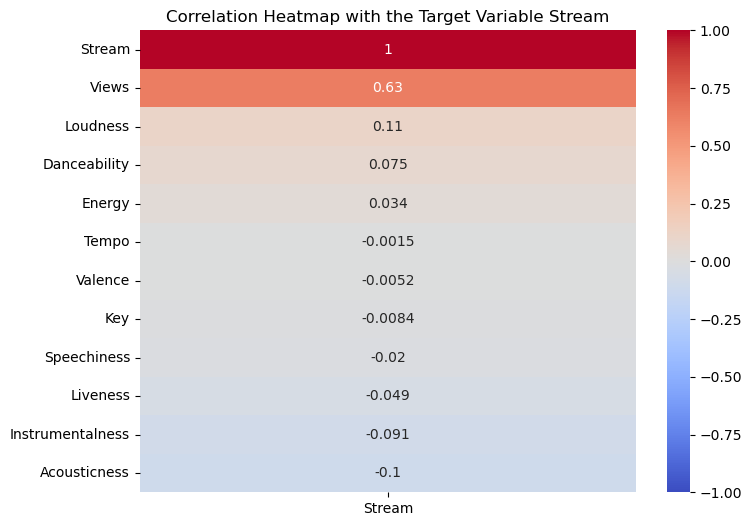

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(streams_correlation.sort_values(by='Stream', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap with the Target Variable Stream')
plt.show()

## Regression Model

### Multivariate Regression for Stream

In [52]:
# Multivariate regression with all Spotify API variables

x_all = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
x_all = x_all.to_numpy().reshape(-1,10)
y = df["Stream"]

model = LinearRegression()
model.fit(x_all, y)
y_pred = model.predict(x_all)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print("R2:", R2)

R2: 0.031135831389303315


### Multivariate Regression for Views



In [53]:
# Multivariate regression with all Spotify API variables

x_all = df[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
x_all = x_all.to_numpy().reshape(-1,10)
y = df["Views"]

model = LinearRegression()
model.fit(x_all, y)
y_pred = model.predict(x_all)

MSE = mean_squared_error(y, y_pred)
R2 = r2_score(y, y_pred)

print("R2:", R2)

R2: 0.019606660979755386


## Classification Model

In [55]:
X = df[['Danceability', 'Energy', 'Loudness', 'Key','Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms',]]
y = df['Hit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [56]:
X_train.head()

,Danceability,Energy,Loudness,Key,Speechiness,Instrumentalness,Acousticness,Liveness,Valence,Tempo,Duration_ms
12354,0.580,0.680,-8.605,5.0,0.0880,0.000002,0.4690,0.2800,0.739,143.889,150070.0
2208,0.820,0.809,-6.759,4.0,0.2510,0.001750,0.4430,0.0613,0.737,83.011,231240.0
1275,0.503,0.582,-4.324,0.0,0.0253,0.000000,0.4720,0.1030,0.326,77.321,243057.0
10619,0.420,0.725,-4.262,8.0,0.2230,0.000000,0.0920,0.1800,0.186,77.941,501648.0
6266,0.630,0.848,-6.242,2.0,0.0409,0.018200,0.0162,0.2710,0.776,100.004,284933.0


In [57]:
X_test.head()

,Danceability,Energy,Loudness,Key,Speechiness,Instrumentalness,Acousticness,Liveness,Valence,Tempo,Duration_ms
16694,0.729,0.513,-7.507,6.0,0.0554,0.000000,0.1250,0.1120,0.775,97.254,199924.0
18121,0.575,0.796,-5.152,2.0,0.1150,0.000000,0.0242,0.0842,0.492,99.836,225573.0
2152,0.742,0.420,-6.797,9.0,0.0310,0.000041,0.5620,0.0402,0.594,134.624,219427.0
5583,0.639,0.269,-11.435,8.0,0.0698,0.120000,0.9820,0.1410,0.539,124.866,207827.0
773,0.832,0.544,-12.697,6.0,0.0442,0.000139,0.2010,0.6320,0.928,119.490,275533.0


In [58]:
X_train.columns = ['Danceability', 'Energy', 'Loudness', 'Key','Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

X_test.columns = ['Danceability', 'Energy', 'Loudness', 'Key','Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']

In [59]:
counter = Counter(y_train)
print(counter)

Counter({0: 5070, 1: 3359, 2: 1179})


In [60]:
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_sm)
print('after', counter)

after Counter({0: 5070, 1: 5070, 2: 5070})


### Logistic + Ridge

In [61]:
model = LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial', random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', model)
])

param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', refit=True)

grid_search.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'logistic__C': 1}
Best cross-validation score: 0.44


In [62]:
y_pred = grid_search.predict(X_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.45      0.54      2126
           1       0.41      0.27      0.33      1495
           2       0.18      0.62      0.28       498

    accuracy                           0.40      4119
   macro avg       0.42      0.45      0.38      4119
weighted avg       0.51      0.40      0.43      4119



### KNN Classifier

In [65]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto'],
    'p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, verbose=1)

grid_search_knn.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'algorithm': 'auto', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.61


In [66]:
y_pred = grid_search_knn.predict(X_test)

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.46      0.52      2126
           1       0.45      0.43      0.44      1495
           2       0.19      0.40      0.26       498

    accuracy                           0.44      4119
   macro avg       0.41      0.43      0.41      4119
weighted avg       0.50      0.44      0.46      4119



### Decision Tree Classifier

In [69]:
dtree = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15, 20, 25],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search_dt = GridSearchCV(dtree, param_grid, cv=5, scoring='f1_weighted', verbose=1, refit=True)

grid_search_dt.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search_dt.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.56


In [70]:
y_pred = grid_search_dt.predict(X_test)

# Print performance metrics
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.63      0.54      0.58      2126
           1       0.46      0.45      0.46      1495
           2       0.22      0.36      0.28       498

    accuracy                           0.49      4119
   macro avg       0.44      0.45      0.44      4119
weighted avg       0.52      0.49      0.50      4119



### Random Forest Classifier

In [71]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1)

grid_search_rf.fit(X_train_sm, y_train_sm)

print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search_rf.best_score_))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.68


In [72]:
y_pred = grid_search_rf.predict(X_test)

# Print performance metrics
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      2126
           1       0.50      0.48      0.49      1495
           2       0.31      0.33      0.32       498

    accuracy                           0.55      4119
   macro avg       0.48      0.49      0.48      4119
weighted avg       0.55      0.55      0.55      4119



### Feature Importance Engineering

In [73]:
best_rf = grid_search_rf.best_estimator_

In [74]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

In [75]:
print("Feature ranking:")
for f in range(len(importances)):
    print(f"{f + 1}. feature {indices[f]} ({X_train.columns[indices[f]]}) - {importances[indices[f]]:.3f}")


Feature ranking:
1. feature 10 (Duration_ms) - 0.126
2. feature 2 (Loudness) - 0.105
3. feature 6 (Acousticness) - 0.099
4. feature 4 (Speechiness) - 0.098
5. feature 1 (Energy) - 0.093
6. feature 0 (Danceability) - 0.088
7. feature 8 (Valence) - 0.087
8. feature 7 (Liveness) - 0.085
9. feature 9 (Tempo) - 0.085
10. feature 3 (Key) - 0.073
11. feature 5 (Instrumentalness) - 0.061


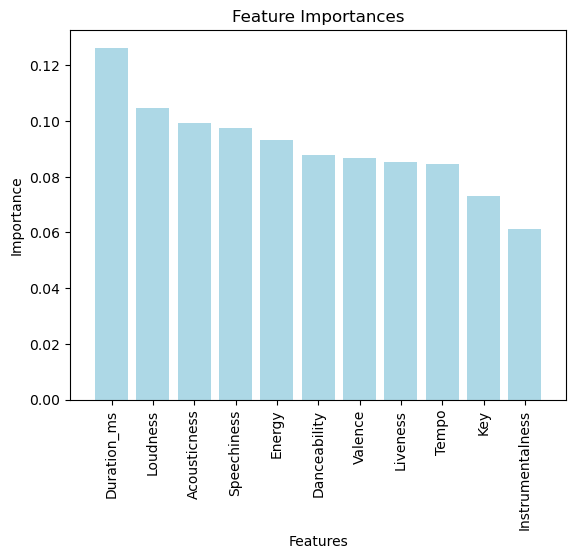

In [76]:
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color="lightblue", align="center")
plt.xticks(range(len(importances)), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Model Evaluation

In [77]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      2126
           1       0.50      0.48      0.49      1495
           2       0.31      0.33      0.32       498

    accuracy                           0.55      4119
   macro avg       0.48      0.49      0.48      4119
weighted avg       0.55      0.55      0.55      4119



In [78]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ['0', '1', '2']

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
      0    1    2
0  1366  562  198
1   598  725  172
2   164  169  165


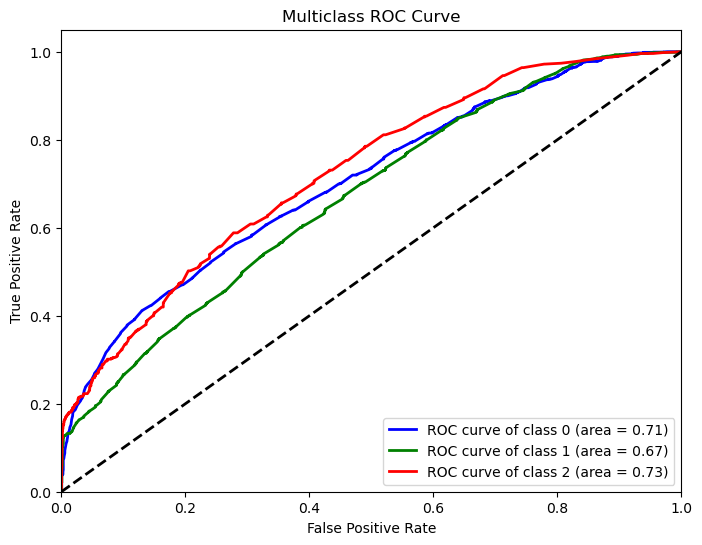

In [79]:
classes = np.unique(y_train_sm)
y_test_binarized = label_binarize(y_test, classes=classes)

n_classes = y_test_binarized.shape[1]

y_pred_proba = best_rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [83]:
joblib.dump(best_rf, '/Users/robintran/Desktop/best_rf_model.pkl')

['/Users/robintran/Desktop/best_rf_model.pkl']

In [84]:
model = joblib.load('/Users/robintran/Desktop/best_rf_model.pkl')

In [85]:
#Test
data = {
    'Danceability': [0.5],  # Example value, replace with a test value
    'Energy': [0.5],        # Example value, replace with a test value
    'Loudness': [-5.0],     # Example value, replace with a test value
    'Key': [5],             # Example value, replace with a test value
    'Speechiness': [0.1],   # Example value, replace with a test value
    'Instrumentalness': [0.0], # Example value, replace with a test value
    'Acousticness': [0.2],  # Example value, replace with a test value
    'Liveness': [0.15],     # Example value, replace with a test value
    'Valence': [0.4],       # Example value, replace with a test value
    'Tempo': [120.0],       # Example value, replace with a test value
    'Duration_ms': [200000] # Example value, replace with a test value
}
df = pd.DataFrame(data)

In [86]:
predictions = model.predict(df)
print("Predictions:", predictions)

Predictions: [2]
